<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/kmeans_spotify_data_with_audio_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore') 


In [ ]:
# 1
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features
#Check the present working directory using pwd command

# 2
#descomentar apenas para o primeiro download
# !kaggle datasets download -d rafaelnduarte/spotify-data-with-audio-features
# !unzip \*.zip  && rm *.zip

# 3
data_world=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/world_data.csv')
data_brazil=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/brazil_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features


In [ ]:
print('World')
print("variáveis: ", data_world.shape[1])
print("dados:     ", data_world.shape[0])

print('Brazil')
print("variáveis: ", data_brazil.shape[1])
print("dados:     ", data_brazil.shape[0])

World
variáveis:  18
dados:      9320
Brazil
variáveis:  18
dados:      9239


In [ ]:
data_world

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,215280,4
1,1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,98,0.598,0.427,7,-8.764,0,0.0317,0.05460,0.000006,0.2100,0.0605,76.469,175721,4
2,2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,93,0.474,0.631,5,-5.884,0,0.3430,0.06870,0.000000,0.1320,0.4250,180.051,189323,4
3,3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,163636,5
4,4,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.57600,0.000000,0.2100,0.0916,101.993,206459,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,9315,Griselda,Cruiser Weight Coke,5miZ7ZA8XJX0zGaTmtyzXn,55,0.728,0.809,3,-5.678,1,0.4350,0.25700,0.000000,0.3810,0.5990,130.018,232951,4
9316,9316,Koe Wetzel,Powerball,0cC187gu6Kcdr5VH7qxq4W,52,0.456,0.512,0,-8.650,1,0.0381,0.00846,0.000000,0.1650,0.0951,130.072,255157,4
9317,9317,Miky Woodz,Forever Happy,3Q8848wMFrcBiny6lVl4l0,66,0.580,0.716,11,-3.928,0,0.0852,0.29300,0.000000,0.1290,0.5090,111.897,183093,5
9318,9318,Bazzi,Live Forever,3QDnzbpwnVPhx314RDZotp,56,0.572,0.664,1,-5.498,1,0.0610,0.24300,0.000024,0.0614,0.5390,169.822,152471,4


In [ ]:
data_brazil

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.5500,5,-7.026,0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784,4
1,1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.7430,4,-4.434,1,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748,4
2,2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.8400,10,-3.240,0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246,4
3,3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.7950,0,-5.536,0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771,4
4,4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.8700,11,-3.123,1,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,9234,DeathbyRomy,Dangerous (feat. blackbear),7bw4hAqx7oUwvIFKOn0Acq,63,0.430,0.6260,9,-6.219,0,0.0491,0.0158,0.000000,0.3800,0.613,99.702,126479,4
9235,9235,Lasso,Subtítulos,2O2J6GrQzv3mkXuMfFEPMY,75,0.631,0.7900,1,-3.807,1,0.2730,0.7010,0.000004,0.0947,0.729,195.919,191613,4
9236,9236,_tag,busking,6hBofveV7cUFOSuUB9RQjk,65,0.622,0.0701,0,-13.016,1,0.0421,0.4950,0.911000,0.1020,0.247,77.065,140714,4
9237,9237,Sabine Paulet,flâner,26l6Ll6gjTkxgVgzuUq0AE,65,0.407,0.1560,1,-19.551,1,0.0374,0.9870,0.874000,0.0957,0.342,102.630,195500,4


In [ ]:
data_world.drop(data_world.columns[[0, 3]], axis=1, inplace=True)
data_brazil.drop(data_brazil.columns[[0, 3]], axis=1, inplace=True)

In [ ]:
data_world.isnull().sum()


artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
data_brazil.isnull().sum()


artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
data_world.nunique()

artist_name         2626
track_name          8975
popularity           101
danceability         923
energy              1698
key                   12
loudness            7051
mode                   2
speechiness         1224
acousticness        2289
instrumentalness    2550
liveness            1166
valence             1310
tempo               8335
duration_ms         8488
time_signature         5
dtype: int64

In [ ]:
data_brazil.nunique()

artist_name         2660
track_name          9018
popularity           101
danceability         906
energy              1656
key                   12
loudness            7148
mode                   2
speechiness         1199
acousticness        2183
instrumentalness    2544
liveness            1391
valence             1299
tempo               8127
duration_ms         8434
time_signature         5
dtype: int64

In [ ]:
data_world['key'].unique()

array([ 0,  7,  5,  6,  4, 11,  1, 10,  2,  8,  9,  3])

In [ ]:
data_world['mode'].unique()

array([1, 0])

In [ ]:
data_world['time_signature'].unique()

array([4, 5, 1, 3, 0])

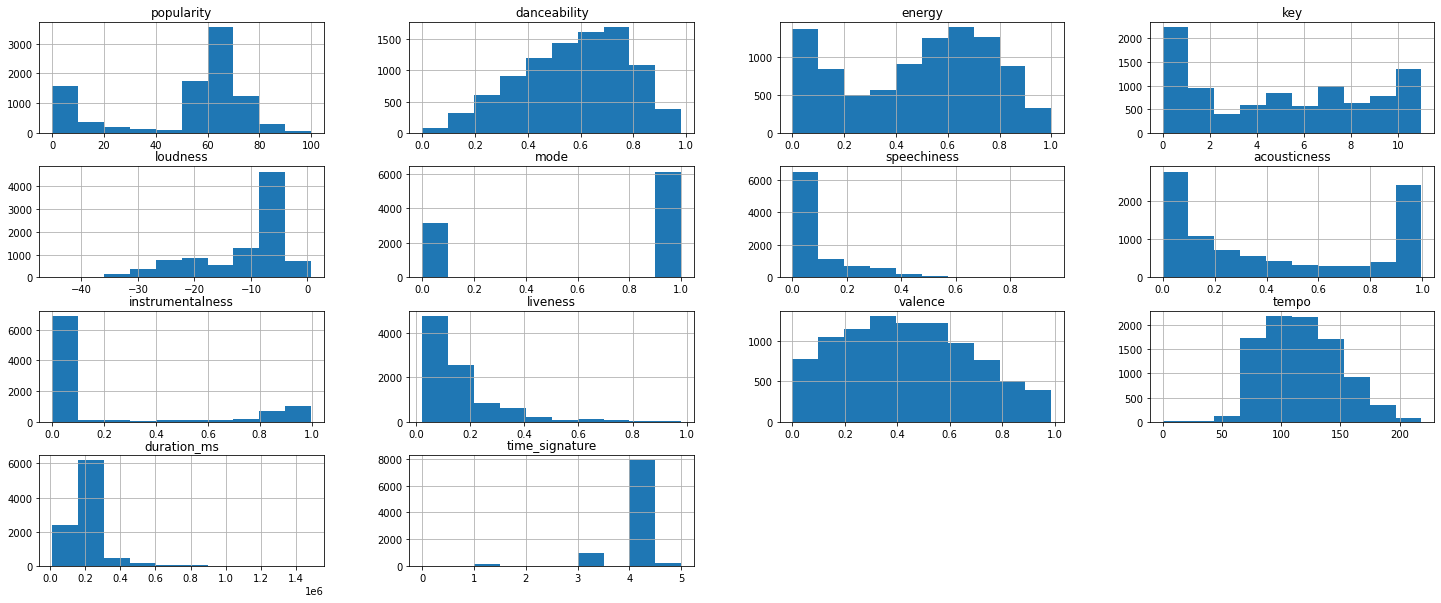

In [ ]:
# data_world.describe()
hist = data_world.hist(bins=10, figsize=(25,10))

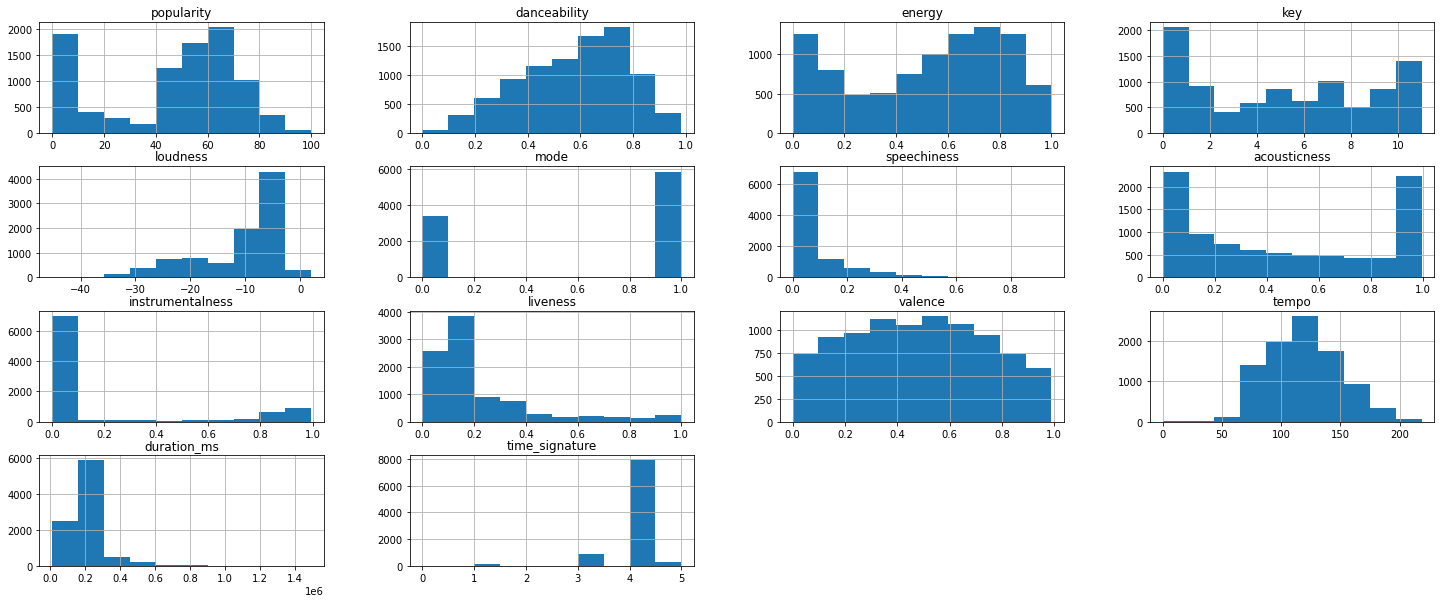

In [ ]:
hist = data_brazil.hist(bins=10, figsize=(25,10))

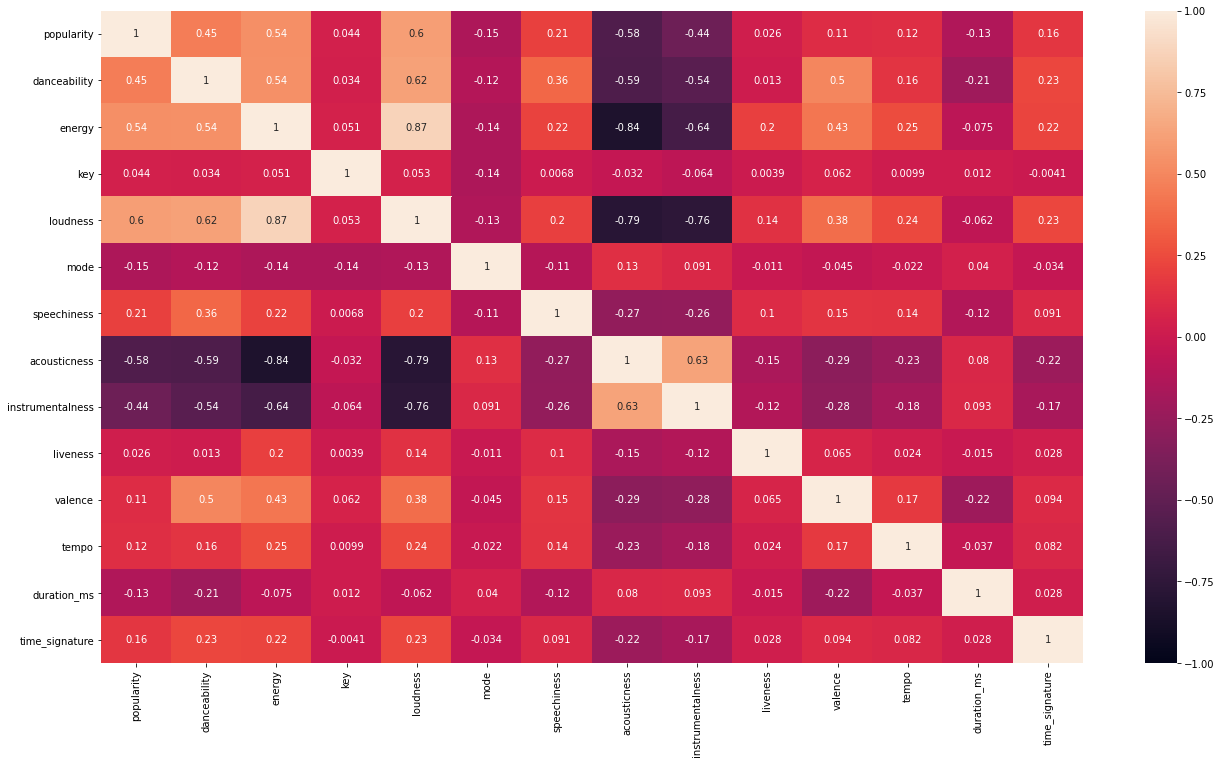

In [ ]:
plt.figure(figsize=(22,12))
fig = sns.heatmap(data_world.corr(), vmax=1, vmin=-1, annot=True)

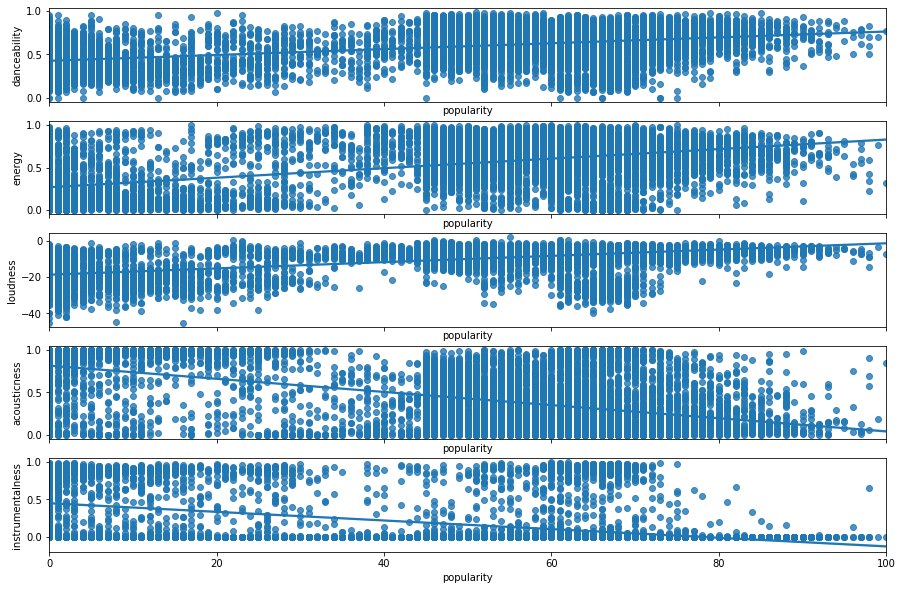

In [ ]:
fig, axes = plt.subplots(5, sharex=True, figsize=(15,10))

sns.regplot(x=data_brazil['popularity'], y=data_brazil['danceability'], ax=axes[0])
sns.regplot(x=data_brazil['popularity'], y=data_brazil['energy'], ax=axes[1])
sns.regplot(x=data_brazil['popularity'], y=data_brazil['loudness'], ax=axes[2])

sns.regplot(x=data_brazil['popularity'], y=data_brazil['acousticness'], ax=axes[3])
sns.regplot(x=data_brazil['popularity'], y=data_brazil['instrumentalness'], ax=axes[4])


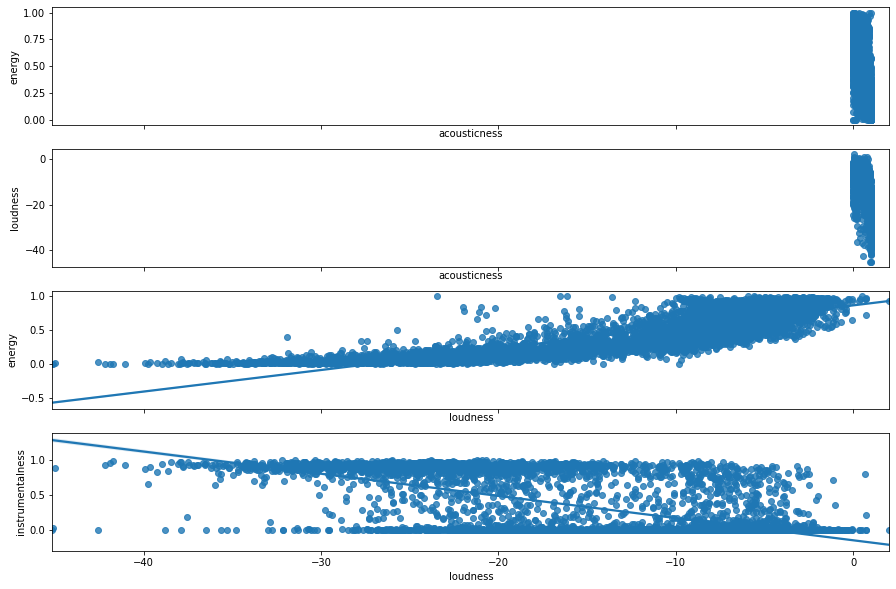

In [ ]:
fig, axes = plt.subplots(4, sharex=True, figsize=(15,10))
sns.regplot(x=data_brazil['acousticness'], y=data_brazil['energy'], ax=axes[0])
sns.regplot(x=data_brazil['acousticness'], y=data_brazil['loudness'], ax=axes[1])
sns.regplot(x=data_brazil['loudness'], y=data_brazil['energy'], ax=axes[2])
sns.regplot(x=data_brazil['loudness'], y=data_brazil['instrumentalness'], ax=axes[3])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
data_brazil

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,86,0.832,0.5500,5,-7.026,0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,85,0.665,0.7430,4,-4.434,1,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,85,0.722,0.8400,10,-3.240,0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,84,0.648,0.7950,0,-5.536,0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,84,0.528,0.8700,11,-3.123,1,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,DeathbyRomy,Dangerous (feat. blackbear),63,0.430,0.6260,9,-6.219,0,0.0491,0.0158,0.000000,0.3800,0.613,99.702,126479,4
9235,Lasso,Subtítulos,75,0.631,0.7900,1,-3.807,1,0.2730,0.7010,0.000004,0.0947,0.729,195.919,191613,4
9236,_tag,busking,65,0.622,0.0701,0,-13.016,1,0.0421,0.4950,0.911000,0.1020,0.247,77.065,140714,4
9237,Sabine Paulet,flâner,65,0.407,0.1560,1,-19.551,1,0.0374,0.9870,0.874000,0.0957,0.342,102.630,195500,4


In [ ]:
spotify_num = data_world.drop(data_world.columns[[0, 1]], axis=1)
spotify_cols = data_world.columns[2:]

spotify_num_br = data_brazil.drop(data_brazil.columns[[0, 1]], axis=1)
spotify_cols_br = data_brazil.columns[2:]
# spotify_num
# spotify_cols
# spotify_num_br

In [ ]:
scaler = MinMaxScaler();
scaled = pd.DataFrame(scaler.fit_transform(spotify_num))
# scaled = scaled.iloc[:300]
scaled.columns = spotify_cols

scaled_br = pd.DataFrame(scaler.fit_transform(spotify_num_br))
scaled_br.columns = spotify_cols_br
# scaled_br = scaled_br.iloc[:300]

# scaled.head()

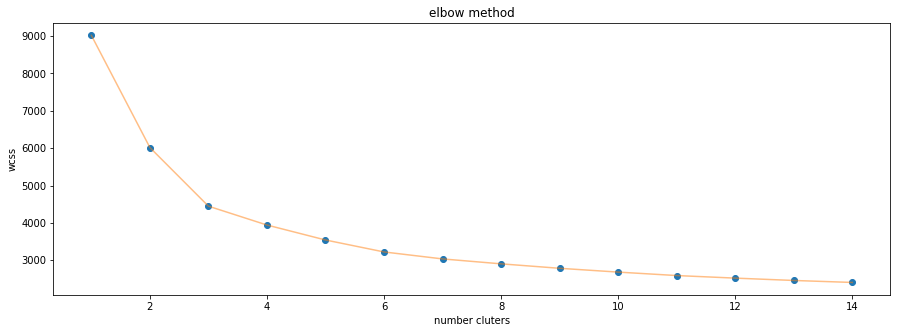

In [ ]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # kmeans.fit(spotify_num)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1,15), wcss, '-', alpha=0.5)
plt.title('elbow method')
plt.xlabel('number cluters')
plt.ylabel('wcss')
plt.show()

In [ ]:
print('Diferença entre os elementos:', np.diff(wcss))

Diferença entre os elementos: [-3002.55828953 -1568.73451054  -504.62022474  -400.33664621
  -320.09250517  -186.524016    -131.71302382  -119.18145866
  -101.83587153   -92.29636289   -68.70584429   -62.8800026
   -52.95863767]


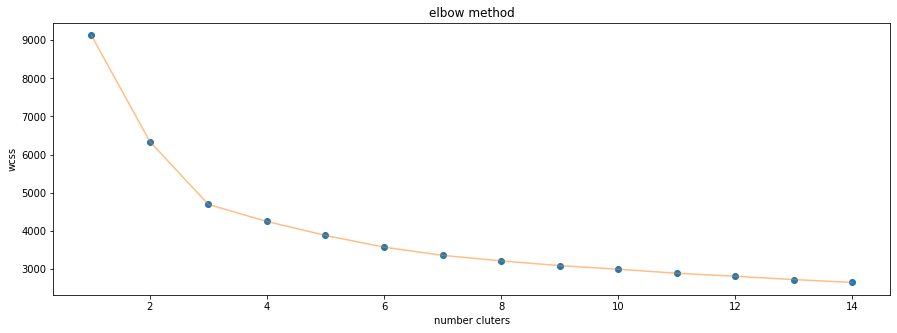

In [ ]:
wcss_br = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # kmeans.fit(spotify_num)
  kmeans.fit(scaled_br)
  wcss_br.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,15), wcss_br, 'o')
plt.plot(range(1,15), wcss_br, '-', alpha=0.5)
plt.title('elbow method')
plt.xlabel('number cluters')
plt.ylabel('wcss')
plt.show()

In [ ]:
print('Diferença entre os elementos:', np.diff(wcss_br))

Diferença entre os elementos: [-2787.62575592 -1649.21795833  -446.06857929  -366.41627744
  -308.03445446  -214.80364569  -145.26940153  -124.31419056
   -93.94116571  -106.18775084   -79.35331224   -85.86506586
   -75.98381237]


In [ ]:
k_means = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = k_means.fit_predict(scaled_br)
# y_kmeans

In [ ]:
df_kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
df_kmeans.columns = ['k_cluster']

In [ ]:
data_brazil = pd.concat([data_brazil, df_kmeans], axis=1)
# data_brazil

In [ ]:
data_brazil['k_cluster'].value_counts()

2    2762
0    1948
4    1608
1    1324
5     965
3     632
Name: k_cluster, dtype: int64

In [ ]:
data_brazil[data_brazil['k_cluster'] == 0].head(10)

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
4,Jorge & Mateus,Cheirosa - Ao Vivo,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930,4,0
6,Lexa,Chama Ela (feat. Pedro Sampaio),84,0.888,0.841,6,-1.933,1,0.1470,0.4600,0.000091,0.0568,0.964,149.994,120200,4,0
13,Pk,Quando a vontade bater (Participação especial ...,83,0.621,0.700,8,-5.502,1,0.2470,0.5390,0.000000,0.1520,0.704,149.902,166400,4,0
14,Matuê,Kenny G,82,0.417,0.767,9,-3.310,1,0.1940,0.0778,0.000000,0.1130,0.152,72.573,189600,3,0
15,MC JottaPê,Sentou e Gostou,82,0.702,0.672,7,-3.308,1,0.3970,0.2610,0.000988,0.0916,0.722,131.453,163253,4,0
20,ANAVITÓRIA,Pupila,81,0.716,0.426,10,-9.576,1,0.1280,0.4010,0.000000,0.1100,0.434,88.794,202288,4,0
21,MC G15,Ela Vem,81,0.616,0.634,11,-7.389,1,0.5460,0.6190,0.000000,0.0732,0.586,185.186,196800,5,0
22,Gusttavo Lima,Quem Traiu Levou - Ao Vivo,81,0.583,0.958,11,-2.395,1,0.0849,0.3250,0.000002,0.3220,0.826,173.937,154183,4,0
23,Guilherme & Benuto,3 Batidas - Ao Vivo,81,0.552,0.709,8,-5.435,1,0.1290,0.6110,0.000000,0.7630,0.528,117.582,157186,4,0
27,Xand Avião,Algo Mais (Amante) - Ao Vivo,80,0.697,0.844,9,-3.076,1,0.0575,0.2850,0.000000,0.7530,0.665,139.993,231680,4,0


In [ ]:
data_brazil[data_brazil['k_cluster'] == 1].head(10)

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
425,ANAVITÓRIA,209,4,0.3270,0.12400,7,-19.962,1,0.0767,0.968,0.898,0.108,0.922,157.454,18373,4,1
811,Elton John,Your Song (Arr. for Guitar),0,0.6650,0.25800,3,-10.770,1,0.0433,0.897,0.842,0.120,0.219,124.039,256452,4,1
1395,Ludovico Einaudi,I giorni,1,0.3610,0.12200,2,-25.110,1,0.0536,0.976,0.891,0.135,0.105,130.453,381150,3,1
1593,Johann Sebastian Bach,"教会カンタータ, BWV 147: ''主よ,人の望みの喜びよ''",0,0.0748,0.00743,7,-24.421,1,0.0480,0.609,0.809,0.110,0.197,76.515,255440,4,1
1599,Johann Sebastian Bach,Partita n. 6 in Mi Minore: Tempo di gavotta,0,0.4210,0.48300,7,-15.426,1,0.0443,0.988,0.905,0.170,0.968,120.679,50233,3,1
1600,Johann Sebastian Bach,"Christmas Oratorio, BWV 248 / Pt. One - For Th...",1,0.4310,0.38800,2,-11.017,1,0.0343,0.883,0.889,0.418,0.254,125.237,498253,4,1
1607,Johann Sebastian Bach,"Herz und Mund und Tat und Leben, Cantata BWV 1...",1,0.1650,0.12300,6,-19.504,1,0.0413,0.976,0.905,0.109,0.110,109.564,240453,4,1
1615,Johann Sebastian Bach,"Ich freue mich in dir: Chorale: Wohlan, so wil...",0,0.1720,0.03470,2,-24.498,1,0.0507,0.988,0.746,0.197,0.219,76.071,64960,4,1
1617,Johann Sebastian Bach,Sie werden aus Saba alle kommen: Chorale: Ei n...,0,0.2140,0.06160,0,-22.261,1,0.0373,0.981,0.787,0.133,0.294,73.426,86160,1,1
1619,Johann Sebastian Bach,"Nun lob, mein Seel, den Herren",0,0.1920,0.07600,0,-16.885,1,0.0361,0.738,0.967,0.126,0.120,67.576,153533,4,1


In [ ]:
data_brazil[data_brazil['k_cluster'] == 2].head(10)

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784,4,2
2,MC Du Black,Gaiola É o Troco,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246,4,2
3,Anitta,Some que ele vem atrás,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771,4,2
5,Felipe Original,Hit Contagiante,84,0.819,0.684,6,-7.169,0,0.1190,0.1320,0.000000,0.0942,0.959,170.187,137125,4,2
7,Jorge & Mateus,Tijolão - Ao Vivo,83,0.637,0.877,4,-3.680,0,0.1980,0.4690,0.000000,0.3430,0.691,118.889,175219,4,2
11,Leo Santana,Contatinho - Ao Vivo Em São Paulo / 2019,83,0.787,0.934,10,-5.136,0,0.0773,0.2230,0.000019,0.9510,0.813,152.018,173230,4,2
12,Matheus & Kauan,Quarta Cadeira - Ao Vivo,82,0.565,0.820,5,-5.031,0,0.2430,0.5890,0.000000,0.6210,0.604,76.471,224002,4,2
17,Vitão,Complicado,82,0.734,0.484,7,-7.486,0,0.1300,0.5700,0.000000,0.2240,0.499,130.050,179339,4,2
24,Giulia Be,menina solta,81,0.632,0.559,11,-6.740,0,0.0797,0.3310,0.000000,0.1600,0.673,91.811,150026,4,2
34,MC Ysa,Baile da Colômbia (Brega Funk) - Remix,79,0.838,0.568,5,-5.555,0,0.1110,0.4190,0.000000,0.0617,0.939,170.015,124000,4,2


In [ ]:
data_brazil[data_brazil['k_cluster'] == 3].head(10)

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
128,Billie Eilish,everything i wanted,98,0.704,0.2250,6,-14.454,0,0.0994,0.902,0.657000,0.1060,0.243,120.006,245426,4,3
288,ANAVITÓRIA,dois rios,61,0.672,0.2800,11,-14.714,0,0.0286,0.964,0.015700,0.0843,0.312,139.958,214054,4,3
420,Lil Wayne,I'm The Best Rapper Alive,3,0.695,0.3170,1,-10.557,0,0.5280,0.884,0.000000,0.2000,0.775,110.667,76200,5,3
946,Lana Del Rey,Cinnamon Girl,76,0.292,0.3340,6,-10.679,0,0.0378,0.839,0.345000,0.1510,0.148,67.836,300683,4,3
1303,Saulo,Outra Vez - Ao Vivo,57,0.320,0.1380,2,-22.236,0,0.0635,0.944,0.000002,0.7180,0.456,75.575,257283,4,3
1325,Lana Del Rey,Venice Bitch,74,0.404,0.2980,9,-12.986,0,0.0304,0.912,0.228000,0.0996,0.315,78.815,577199,4,3
1335,MC Menor da VG,Meia Noite,57,0.690,0.1250,2,-13.369,0,0.3950,0.892,0.000117,0.1390,0.065,134.309,204864,5,3
1355,Renato Enoch,Seu Crime,56,0.584,0.0933,8,-10.887,0,0.0480,0.835,0.000000,0.3300,0.240,109.905,199004,4,3
1442,Lana Del Rey,The greatest,74,0.414,0.2300,2,-12.379,0,0.0406,0.942,0.016700,0.1730,0.192,78.494,300361,3,3
1473,Vitão,"Céu Azul - Ao Vivo No Youtube Music Night, Rio...",56,0.366,0.2760,6,-12.398,0,0.0321,0.839,0.000000,0.6300,0.450,115.875,221500,4,3


In [ ]:
data_brazil[data_brazil['k_cluster'] == 5].head(10)